<img src="https://news.illinois.edu/files/6367/543635/116641.jpg" alt="University of Illinois" width="250"/>

# Learning Linear Regression #
By Richard Sowers
* <r-sowers@illinois.edu>
* <https://publish.illinois.edu/r-sowers/>

Copyright 2020 University of Illinois Board of Trustees. All Rights Reserved.

### imports and graphics configurations ###

In [1]:
import os
import numpy
import pandas
import time
import random
import matplotlib
#%matplotlib notebook
import matplotlib.pyplot as plt
import scipy.stats
#from pandas.plotting import autocorrelation_plot
import matplotlib.offsetbox as offsetbox
from matplotlib.ticker import StrMethodFormatter

import imageio
import PIL

def saver(fname):
    plt.savefig(fname+".png",bbox_inches="tight")
    
def legend(pos="bottom",ncol=3,extra=False):
    if pos=="bottom":
        extra = 0.15 if extra else 0
        plt.legend(bbox_to_anchor=(0.5,-0.2-extra), loc='upper center',facecolor="lightgray",ncol=ncol)
    elif pos=="side":
        plt.legend(bbox_to_anchor=(1.1,0.5), loc='center left',facecolor="lightgray",ncol=1)
        
def textbox(txt,fname=None):
    plt.figure(figsize=(1,1))
    plt.gca().add_artist(offsetbox.AnchoredText("\n".join(txt), loc="center",prop=dict(size=30)))
    plt.axis('off')
    if fname is not None:
        saver(fname)
    plt.show()
    plt.close()

In [2]:
#for some reason, this needs to be in a separate cell
params={
    "font.size":15,
    "lines.linewidth":5
}
plt.rcParams.update(params)

In [3]:
pngfiles=[f for f in os.listdir(".") if f.endswith(".png")]
print("existing png files: "+str(pngfiles))
#print([os.remove(f) for f in pngfiles])

existing png files: ['abs_x.png', 'bestcostlines.png', 'bestline.png', 'bestlines.png', 'contour.png', 'contour_largedelta.png', 'contour_smalldelta.png', 'convex_example.png', 'costlines.png', 'dataset.png', 'decreasing_cost.png', 'equicost.png', 'grad_flow.png', 'increasing_cost.png', 'metric.png', 'scored_regression.png', 'singlecost.png', 'singleerror.png', 'toxicity.png', 'toxicity_scored.png', 'toxicity_scored_line.png']


In [4]:
def getfile(location_pair,**kwargs): #tries to get local version and then defaults to google drive version
    (loc,gdrive)=location_pair
    try:
        out=pandas.read_csv(loc,**kwargs)
    except FileNotFoundError:
        print("local file not found; accessing Google Drive")
        loc = 'https://drive.google.com/uc?export=download&id='+gdrive.split('/')[-2]
        out=pandas.read_csv(loc,**kwargs)
    return out

### configuration variables###

In [5]:
url="https://archive.ics.uci.edu/ml/datasets/QSAR+fish+toxicity"
fname=("qsar_fish_toxicity.csv","https://drive.google.com/file/d/1xd30VCQ2clQPzHDXpDi-VPU6pGTIUmQg/view?usp=sharing")
data_color="red"
markersize=2
thinlinesize=2
textboxsize=(5,0.5)

### code starts here###

In [6]:
columns=[
"CIC0",
"SM1_Dz(Z)",
"GATS1i",
"NdsCH",
"NdssC",
"MLOGP",
"LC50" #response
]
(feature,response)=("MLOGP","LC50")

In [7]:
text="\\begin{{center}}\\url{{{0:s}}}\\end{{center}}"
with open("dataurl.tex","w") as f:
    f.write(text.format(url))
f.close()

### load data ###

In [8]:
data_raw=getfile(fname,sep=";",names=columns)

In [9]:
data_raw.head()

,CIC0,SM1_Dz(Z),GATS1i,NdsCH,NdssC,MLOGP,LC50
0,3.260,0.829,1.676,0,1,1.453,3.770
1,2.189,0.580,0.863,0,0,1.348,3.115
2,2.125,0.638,0.831,0,0,1.348,3.531
3,3.027,0.331,1.472,1,0,1.807,3.510
4,2.094,0.827,0.860,0,0,1.886,5.390


In [10]:
data=data_raw.copy()
X=data[feature]
Y=data[response]

In [11]:
data.head().to_latex(buf="sample_data.tex",bold_rows=True)

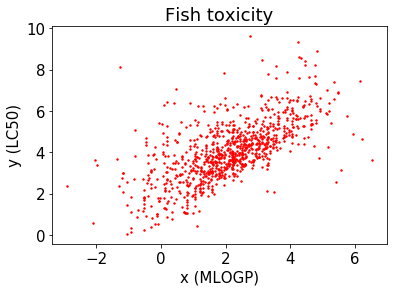

In [12]:
plt.figure()
plt.scatter(X,Y,color=data_color,s=markersize)
title=[]
title.append("Fish toxicity")
plt.title("\n".join(title))
plt.xlabel("x ({0:s})".format(feature))
plt.ylabel("y ({0:s})".format(response))
saver("toxicity")
plt.show()
plt.close()

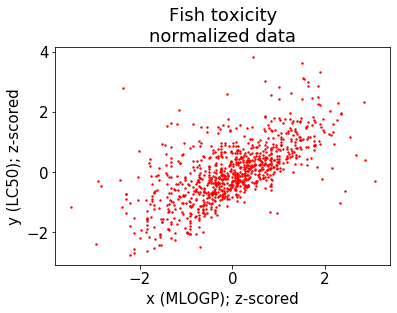

In [13]:
X_scored=scipy.stats.zscore(X)
Y_scored=scipy.stats.zscore(Y)
plt.figure()
plt.scatter(X_scored,Y_scored,color=data_color,s=markersize)
title=[]
title.append("Fish toxicity")
title.append("normalized data")
plt.title("\n".join(title))
plt.xlabel("x ({0:s}); z-scored".format(feature))
plt.ylabel("y ({0:s}); z-scored".format(response))
saver("toxicity_scored")
plt.show()
plt.close()

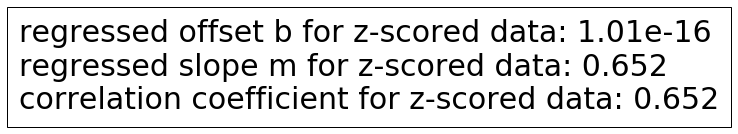

In [14]:
m_opt_scored,b_opt_scored,_,_,_=scipy.stats.linregress(X_scored,Y_scored)
corcoeff=numpy.corrcoef(X_scored,Y_scored)[0,1]
text=[]
text.append("regressed offset b for z-scored data: {0:.2e}".format(b_opt_scored))
text.append("regressed slope m for z-scored data: {0:.3f}".format(m_opt_scored))
text.append("correlation coefficient for z-scored data: {0:.3f}".format(corcoeff))
textbox(text,fname="scored_regression")

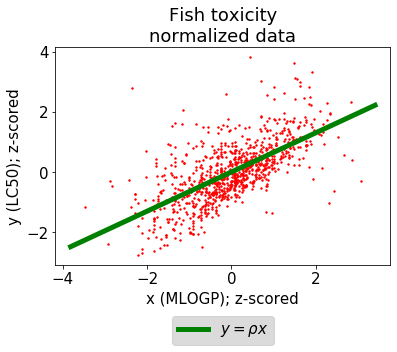

In [15]:
X_scored=scipy.stats.zscore(X)
Y_scored=scipy.stats.zscore(Y)
plt.figure()
plt.scatter(X_scored,Y_scored,color=data_color,s=markersize)
x_range=numpy.array(plt.xlim())
plt.plot(x_range,corcoeff*x_range,color="green",label=r"$y=\rho x$")
title=[]
title.append("Fish toxicity")
title.append("normalized data")
plt.title("\n".join(title))
plt.xlabel("x ({0:s}); z-scored".format(feature))
plt.ylabel("y ({0:s}); z-scored".format(response))
legend("bottom")
saver("toxicity_scored_line")
plt.show()
plt.close()

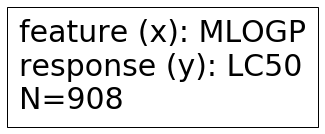

In [16]:
text=[]
text.append("feature (x): {0:s}".format(feature))
text.append("response (y): {0:s}".format(response))
text.append("N={0:d}".format(len(data)))
textbox(text,fname="dataset")

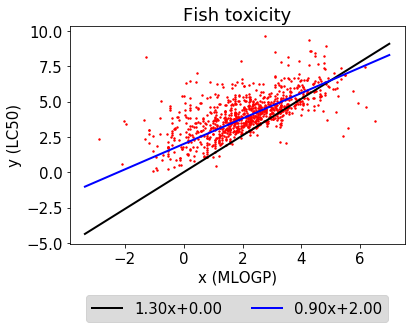

In [17]:
(m_1,b_1,firstcolor)=(1.3,0,"black")
(m_2,b_2,secondcolor)=(0.9,2,"blue")
(feature,response)=("MLOGP","LC50")
plt.figure()
plt.scatter(X,Y,color=data_color,s=markersize)
xlims=numpy.array(plt.gca().get_xlim())
plt.plot(xlims,m_1*xlims+b_1,label="{0:.2f}x+{1:.2f}".format(m_1,b_1),color=firstcolor,linewidth=thinlinesize)
plt.plot(xlims,m_2*xlims+b_2,label="{0:.2f}x+{1:.2f}".format(m_2,b_2),color=secondcolor,linewidth=thinlinesize)
title=[]
title.append("Fish toxicity")
plt.title("\n".join(title))
plt.xlabel("x ({0:s})".format(feature))
plt.ylabel("y ({0:s})".format(response))
legend("bottom")
saver("bestlines")
plt.show()
plt.close()

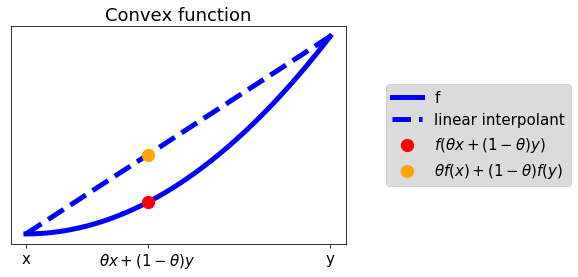

In [18]:
def convex(x):
    return x**2


(x_min,x_max)=(0,1)
pt=0.4
xinterval=numpy.array([x_min,x_max])
xvals=numpy.linspace(x_min,x_max)
plt.figure()
plt.plot(xvals,convex(xvals),zorder=-1,label="f",color="blue")
plt.plot(xinterval,convex(xinterval),zorder=-1,label="linear interpolant",color="blue",linestyle="--")
plt.scatter(pt,convex(pt),s=150,color="red",label=r"$f(\theta x + (1-\theta)y)$")
plt.xticks([x_min,pt,x_max],["x",r"$\theta x + (1-\theta)y$","y"])
plt.yticks([],[])
plt.scatter(pt,(1-pt)*convex(x_min)+pt*convex(x_max),color="orange",s=150,label=r"$\theta f(x)+(1-\theta)f(y)$")
title=[]
title.append("Convex function")
plt.title("\n".join(title))
legend("side")
saver("convex_example")
plt.show()
plt.close()

In [19]:
class LinearRegression:
    def __init__(self,x,y):
        self.xvals=numpy.array(x)
        self.yvals=numpy.array(y)

        self.XXvals=numpy.vstack([self.xvals,[1]*len(self.xvals)])
        self.reset()
        
    def reset(self):
        self.ctr=0
        self.callbacktext=[]
        
    @staticmethod
    def linear_function(p):
        (m,b)=p
        def l_f(x):
            return m*x+b
        return l_f
    
    def Loss(self,p,include_gradient=False):
        err=self.yvals-self.linear_function(p)(self.xvals)
        loss=numpy.mean(err**2)
        if include_gradient:
            out=-2*numpy.mean(err*self.XXvals,axis=1)
            return (loss,out)
        else:
            return loss
        
    def metric(self,p):
        (m,b)=p
        err=self.yvals-self.linear_function(p)(self.xvals)
        return numpy.mean(numpy.abs(err))
    
    def callback(self,x,verbose=False):
        (m,b)=p
        outstr="ctr={0:}; (m,b)=({1:.3f},{2:.2E}); error={3:.2E}".format(self.ctr,m,b,self.Loss(p))
        self.callbacktext.append(outstr)
        if verbose:
            print(outstr)
        self.ctr+=1
        
LR=LinearRegression(X,Y)

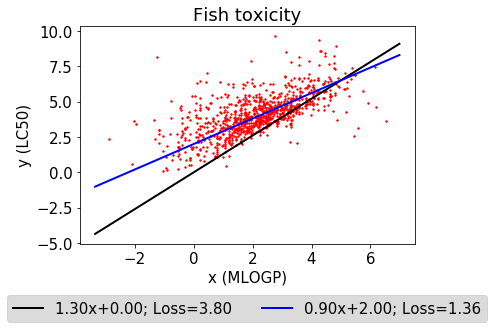

In [20]:
(m_1,b_1,firstcolor)=(1.3,0,"black")
(m_2,b_2,secondcolor)=(0.9,2,"blue")
(feature,response)=("MLOGP","LC50")
plt.figure()
plt.scatter(X,Y,color=data_color,s=markersize)
xlims=numpy.array(plt.gca().get_xlim())
plt.plot(xlims,LR.linear_function([m_1,b_1])(xlims),label="{0:.2f}x+{1:.2f}; Loss={2:.2f}".format(m_1,b_1,LR.Loss([m_1,b_1])),color=firstcolor,linewidth=thinlinesize)
plt.plot(xlims,LR.linear_function([m_2,b_2])(xlims),label="{0:.2f}x+{1:.2f}; Loss={2:.2f}".format(m_2,b_2,LR.Loss([m_2,b_2])),color=secondcolor,linewidth=thinlinesize)
title=[]
title.append("Fish toxicity")
plt.title("\n".join(title))
plt.xlabel("x ({0:s})".format(feature))
plt.ylabel("y ({0:s})".format(response))
legend("bottom")
saver("costlines")
plt.show()
plt.close()

In [21]:
m_opt,b_opt,_,_,_=scipy.stats.linregress(X,Y)
(dm_opt,db_opt)=(0.5,1)
Mvals = numpy.linspace(m_opt-dm_opt,m_opt+dm_opt)
Bvals = numpy.linspace(b_opt-db_opt,b_opt+db_opt)
Mgrid, Bgrid = numpy.meshgrid(Mvals, Bvals)
Err=numpy.array([[LR.Loss([m,b]) for m in Mvals] for b in Bvals])
Err=numpy.sqrt(Err-numpy.min(Err))
#levels=numpy.linspace(start=minE,stop=minE+numpy.ptp(Err)/10,num=10)
levels=numpy.linspace(start=numpy.min(Err),stop=numpy.max(Err),num=10)

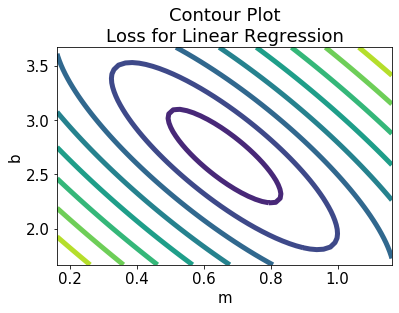

In [22]:
plt.figure
plt.contour(Mvals,Bvals,Err,levels=levels)
title=[]
title.append("Contour Plot")
title.append("Loss for Linear Regression")
plt.title("\n".join(title))
plt.xlim(0.62,0.72)
plt.xlim(m_opt-dm_opt,m_opt+dm_opt)
plt.ylim(b_opt-db_opt,b_opt+db_opt)
plt.xlabel("m")
plt.ylabel("b")
saver("contour")
plt.show()
plt.close()

In [23]:
(m_init,b_init)=(0.8,3.1)
_,(dm_init,db_init)=LR.Loss([m_init,b_init],include_gradient=True)

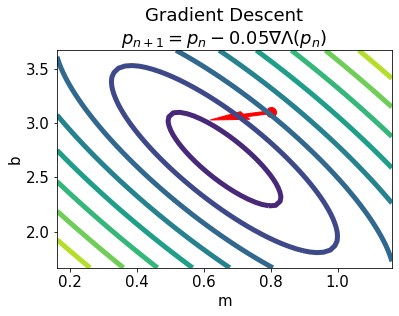

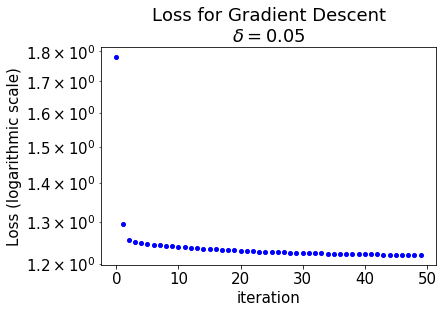

In [24]:
delta=0.05
plt.figure
plt.contour(Mvals,Bvals,Err,levels=levels)
title=[]
title.append("Gradient Descent")
title.append(r"$p_{{n+1}}=p_n-{0:}\nabla \Lambda(p_n)$".format(delta))
plt.scatter(m_init,b_init,s=100,color="red")
plt.arrow(m_init,b_init,-dm_init*delta,-db_init*delta,width=.5*delta,color="r",length_includes_head=True)
plt.title("\n".join(title))
plt.xlim(0.62,0.72)
plt.xlim(m_opt-dm_opt,m_opt+dm_opt)
plt.ylim(b_opt-db_opt,b_opt+db_opt)
plt.xlabel("m")
plt.ylabel("b")
saver("contour_smalldelta")
plt.show()
plt.close()

state=[m_init,b_init]
Losses=[]
N=50
for n in range(N):
    loss,gradient=LR.Loss(state,include_gradient=True)
    Losses.append(loss)
    state=state-delta*gradient

title=[]
title.append("Loss for Gradient Descent")
title.append(r"$\delta={:.2f}$".format(delta))
plt.figure()
plt.semilogy(Losses, 'bo',ms=4)
plt.ylabel("Loss (logarithmic scale)")
plt.xlabel("iteration")
plt.title("\n".join(title))
saver("decreasing_cost")
plt.show()
plt.close()

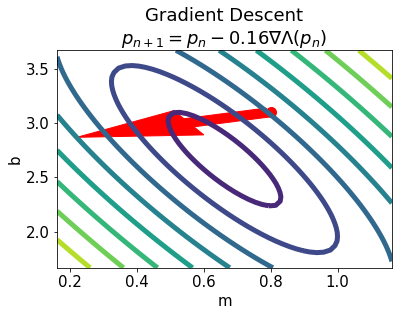

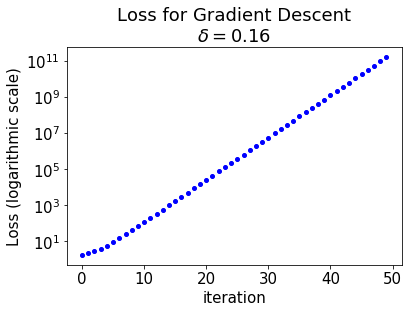

In [25]:
delta=0.16
plt.figure
plt.contour(Mvals,Bvals,Err,levels=levels)
title=[]
title.append("Gradient Descent")
title.append(r"$p_{{n+1}}=p_n-{0:}\nabla \Lambda(p_n)$".format(delta))
plt.scatter(m_init,b_init,s=100,color="red")
plt.arrow(m_init,b_init,-dm_init*delta,-db_init*delta,width=.5*delta,color="r",length_includes_head=True)
plt.title("\n".join(title))
plt.xlim(0.62,0.72)
plt.xlim(m_opt-dm_opt,m_opt+dm_opt)
plt.ylim(b_opt-db_opt,b_opt+db_opt)
plt.xlabel("m")
plt.ylabel("b")
saver("contour_largedelta")
plt.show()
plt.close()

state=[m_init,b_init]
Losses=[]
N=50
for n in range(N):
    loss,gradient=LR.Loss(state,include_gradient=True)
    Losses.append(loss)
    state=state-delta*gradient

title=[]
title.append("Loss for Gradient Descent")
title.append(r"$\delta={:.2f}$".format(delta))
plt.figure()
plt.semilogy(Losses, 'bo',ms=4)
plt.ylabel("Loss (logarithmic scale)")
plt.xlabel("iteration")
plt.title("\n".join(title))
saver("increasing_cost")
plt.show()
plt.close()

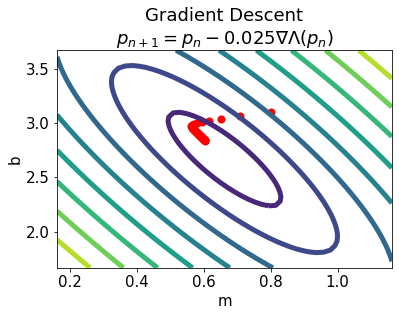

In [26]:
delta=0.025
state=[m_init,b_init]
states=[state]
Losses=[]
N=50
for n in range(N):
    loss,gradient=LR.Loss(state,include_gradient=True)
    Losses.append(loss)
    state=state-delta*gradient
    states.append(state)


states_x=[x for (x,_) in states]
states_y=[y for (_,y) in states]
plt.figure
plt.contour(Mvals,Bvals,Err,levels=levels)
title=[]
title.append("Gradient Descent")
title.append(r"$p_{{n+1}}=p_n-{0:}\nabla \Lambda(p_n)$".format(delta))
plt.scatter(states_x,states_y,s=50,color="red")
plt.title("\n".join(title))
plt.xlim(0.62,0.72)
plt.xlim(m_opt-dm_opt,m_opt+dm_opt)
plt.ylim(b_opt-db_opt,b_opt+db_opt)
plt.xlabel("m")
plt.ylabel("b")
saver("grad_flow")
plt.show()
plt.close()

0.6619027566143653
2.668288900381842


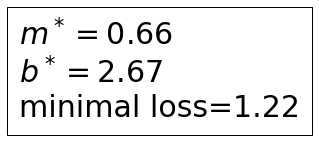

In [27]:
slope,intercept,_,_,_=scipy.stats.linregress(X,Y)
mincost=LR.Loss([slope,intercept])
print(slope)
print(intercept)
text=[]
text.append(r"$m^*={0:.2f}$".format(slope))
text.append(r"$b^*={0:.2f}$".format(intercept))
text.append("minimal loss={0:.2f}".format(mincost))
textbox(text,fname="bestline")

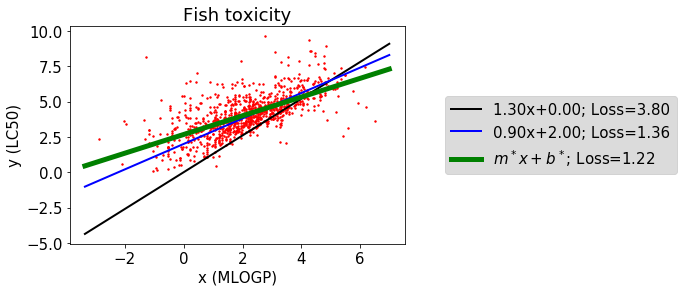

In [28]:
(m_1,b_1,firstcolor)=(1.3,0,"black")
(m_2,b_2,secondcolor)=(0.9,2,"blue")
(m_best,b_best,bestcolor)=(slope,intercept,"green")
(feature,response)=("MLOGP","LC50")
plt.figure()
plt.scatter(X,Y,color=data_color,s=markersize)
xlims=numpy.array(plt.gca().get_xlim())
plt.plot(xlims,LR.linear_function([m_1,b_1])(xlims),label="{0:.2f}x+{1:.2f}; Loss={2:.2f}".format(m_1,b_1,LR.Loss([m_1,b_1])),color=firstcolor,linewidth=thinlinesize)
plt.plot(xlims,LR.linear_function([m_2,b_2])(xlims),label="{0:.2f}x+{1:.2f}; Loss={2:.2f}".format(m_2,b_2,LR.Loss([m_2,b_2])),color=secondcolor,linewidth=thinlinesize)
plt.plot(xlims,LR.linear_function([m_best,b_best])(xlims),label=r"$m^* x+b^*$; Loss={2:.2f}".format(m_best,b_best,LR.Loss([m_best,b_best])),color=bestcolor)
title=[]
title.append("Fish toxicity")
plt.title("\n".join(title))
plt.xlabel("x ({0:s})".format(feature))
plt.ylabel("y ({0:s})".format(response))
legend("side")
saver("bestcostlines")
plt.show()
plt.close()

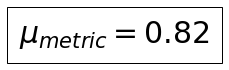

In [29]:
text=[]
text.append(r"$\mu_{{metric}}={0:.2f}$".format(LR.metric([slope,intercept])))
textbox(text,fname="metric")

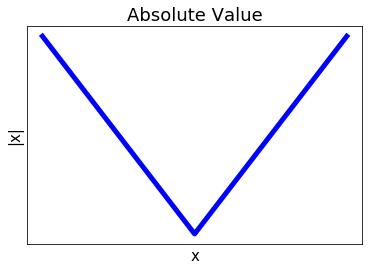

In [30]:
plt.figure()
plt.plot([-1,0,1],[1,0,1],color="blue")
plt.xticks([],[])
plt.yticks([],[])
title=[]
title.append("Absolute Value")
plt.title("\n".join(title))
plt.xlabel("x")
plt.ylabel("|x|")
saver("abs_x")
plt.show()
plt.close()

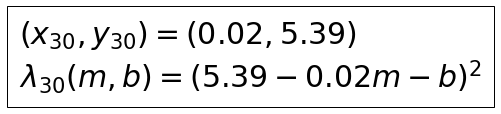

In [31]:
N=30
text=[]
text.append(r"$(x_{{{0:d}}},y_{{{0:d}}})=({1:.2f},{2:.2f})$".format(N,X[N],Y[N]))
text.append(r"$\lambda_{{{0:d}}}(m,b)=({2:.2f}-{1:.2f}m-b)^2$".format(N,X[N],Y[N]))
textbox(text,fname="singlecost")

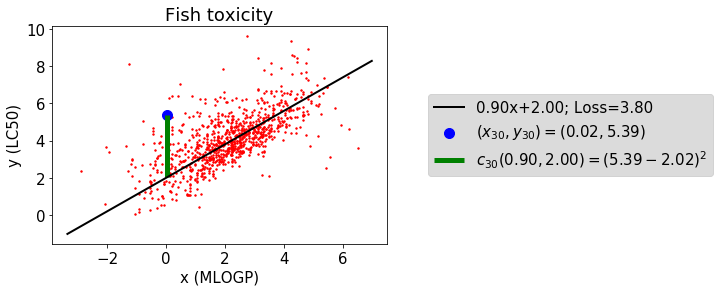

In [32]:
N=30
(m,b,firstcolor)=(0.9,2.0,"black")
(feature,response)=("MLOGP","LC50")
plt.figure()
plt.scatter(X,Y,color=data_color,s=markersize)
plt.scatter(X[N],Y[N],color="blue",s=100,label=r"$(x_{{{0:d}}},y_{{{0:d}}})=({1:.2f},{2:.2f})$".format(N,X[N],Y[N]))
Y_est=m*X[N]+b
plt.vlines(X[N],Y_est,Y[N],color="green",linewidth=5,label=r"$c_{{{0:d}}}({1:.2f},{2:.2f})=({3:.2f}-{4:.2f})^2$".format(N,m,b,Y[N],Y_est))
xlims=numpy.array(plt.gca().get_xlim())
plt.plot(xlims,LR.linear_function([m,b])(xlims),label="{0:.2f}x+{1:.2f}; Loss={2:.2f}".format(m,b,LR.Loss([m_1,b_1])),color=firstcolor,linewidth=thinlinesize)
title=[]
title.append("Fish toxicity")
plt.title("\n".join(title))
plt.xlabel("x ({0:s})".format(feature))
plt.ylabel("y ({0:s})".format(response))
legend("side")
saver("singleerror")
plt.show()
plt.close()

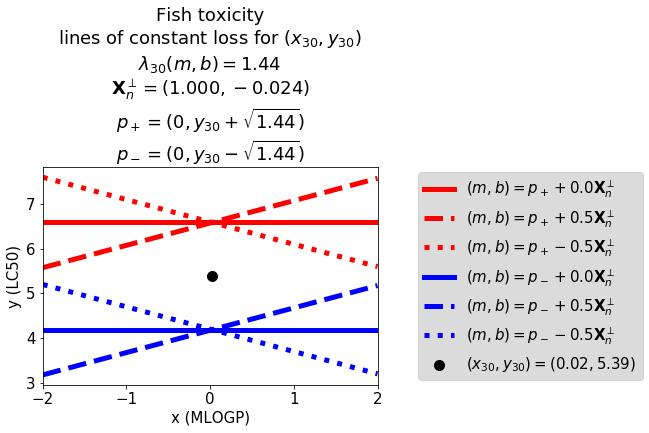

In [33]:
N=30
c=1.44
(x_min,x_max)=(-2,2)
xrange=numpy.array([x_min,x_max])
v=numpy.array([1,-X[N]])
(feature,response)=("MLOGP","LC50")
plt.figure()
p=numpy.array([0,Y[N]+numpy.sqrt(c)])
labeltext=r"$(m,b)=p_+ {0:+.1f}\mathbf{{X}}_n^\perp$"
labelcolor="red"
plt.plot(xrange,LR.linear_function(p)(xrange),label=labeltext.format(0),color=labelcolor,ls="-")
plt.plot(xrange,LR.linear_function(p+0.5*v)(xrange),label=labeltext.format(0.5),color=labelcolor,ls="--")
plt.plot(xrange,LR.linear_function(p-0.5*v)(xrange),label=labeltext.format(-0.5),color=labelcolor,ls=":")

plt.scatter(X[N],Y[N],color="black",s=100,label=r"$(x_{{{0:d}}},y_{{{0:d}}})=({1:.2f},{2:.2f})$".format(N,X[N],Y[N]))


p=numpy.array([0,Y[N]-numpy.sqrt(c)])
labeltext=r"$(m,b)=p_- {0:+.1f}\mathbf{{X}}_n^\perp$"
labelcolor="blue"
plt.plot(xrange,LR.linear_function(p)(xrange),label=labeltext.format(0),color=labelcolor,ls="-")
plt.plot(xrange,LR.linear_function(p+0.5*v)(xrange),label=labeltext.format(0.5),color=labelcolor,ls="--")
plt.plot(xrange,LR.linear_function(p-0.5*v)(xrange),label=labeltext.format(-0.5),color=labelcolor,ls=":")

xlims=numpy.array(plt.gca().get_xlim())
title=[]
title.append("Fish toxicity")
title.append(r"lines of constant loss for $(x_{{{0:d}}},y_{{{0:d}}})$".format(N))
title.append(r"$\lambda_{{{0:d}}}(m,b)={1:.2f}$".format(N,c))
title.append(r"$\mathbf{{X}}_n^\perp=({0:.3f},{1:.3f})$".format(v[0],v[1]))
title.append(r"$p_+=(0,y_{{{0:d}}}+\sqrt{{{1:.2f}}})$".format(N,c))
title.append(r"$p_-=(0,y_{{{0:d}}}-\sqrt{{{1:.2f}}})$".format(N,c))
plt.title("\n".join(title))
plt.xlabel("x ({0:s})".format(feature))
plt.ylabel("y ({0:s})".format(response))
plt.xlim(x_min,x_max)
legend("side")
saver("equicost")
plt.show()
plt.close()